In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

FILE_PATH = "./logs/DMC-10000m-tenByOneKm-06-12-2023_14:04.csv"
episodes = pd.read_csv(FILE_PATH)

Text(0.5, 0, 'Episode')

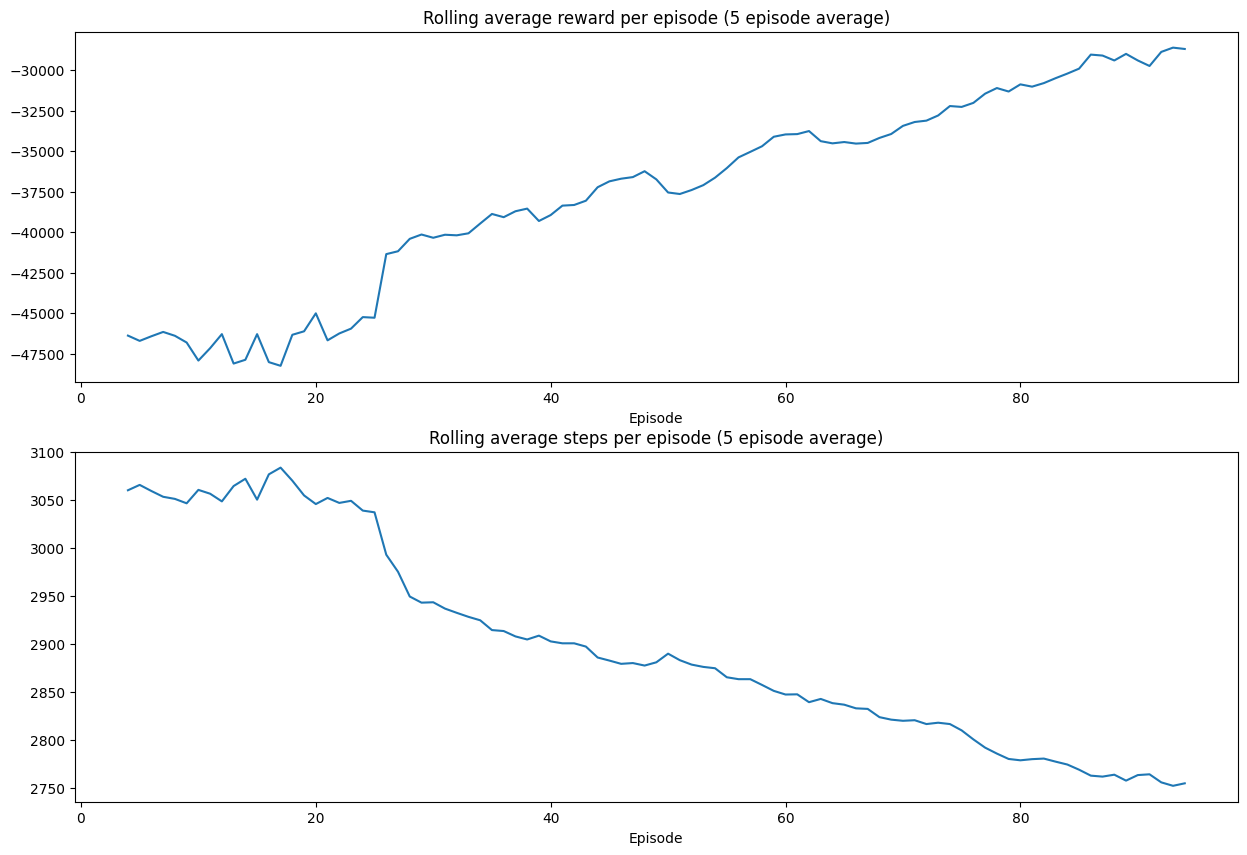

In [81]:
plt.rcParams['figure.figsize'] = [15, 10]

fig, axs = plt.subplots(2, 1)

rolling_average = 5

# Create a rolling average of the total reward per episode``
episodes['rolling_reward'] = episodes['reward'].rolling(rolling_average).mean()

axs[0].plot(episodes['episode'], episodes['rolling_reward'])
axs[0].set_title(f'Rolling average reward per episode ({rolling_average} episode average)')
axs[0].set_xlabel('Episode')

# ---------------------------------------------

episodes['rolling_steps'] = episodes['steps'].rolling(rolling_average).mean()

axs[1].plot(episodes['episode'], episodes['rolling_steps'])
axs[1].set_title(f'Rolling average steps per episode ({rolling_average} episode average)')
axs[1].set_xlabel('Episode')
